

    Logistic Regression
    Support Vector Machine
    Decision Tree
    Naive Bayes
    Random Forest
    Gradient Boosting
    K-Nearest Neighbor
    XG Bosst



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
#Load the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
#Concatenating train and test for easy EDA
train_data['train_or_test']='train'
test_data['train_or_test']='test'
all=pd.concat([train_data,test_data],sort=False)

#Resetting index, removing old index
all.reset_index(inplace=True)
all.drop('index',axis=1,inplace=True)

In [6]:
all.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


### Exploratory Data Analysis

Target variable: Survived (1/0), Potential Predictors: All Others

#### Univariate Analysis

In [7]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1308 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1307 non-null   object 
 12  train_or_test  1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [8]:
all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


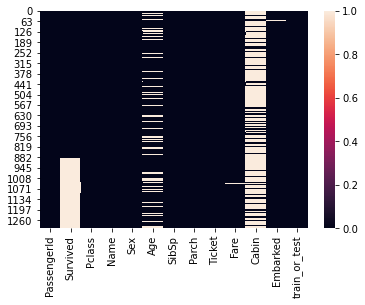

In [9]:
#Visualization to check for missing values
sns.heatmap(all.isnull())

Age, Cabin have significant rows with missing values,while Fare & Embarked have a few rows. Survived missing values from test data.

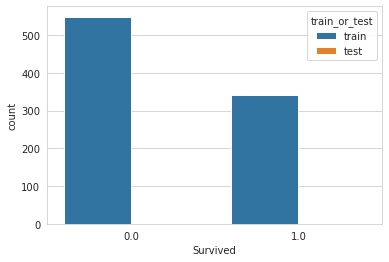

In [10]:
#Survived
sns.set_style('whitegrid')
sns.countplot('Survived',hue='train_or_test',data=all)

In [11]:
#Pclass
all['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [12]:
groupby_df = all[all['train_or_test']=='train'].groupby(['Pclass', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                 Survived
 Pclass Survived          
 1      0.0             80
        1.0            136
 2      0.0             97
        1.0             87
 3      0.0            372
        1.0            119,
                  Survived
 Pclass Survived          
 1      0.0          37.04
        1.0          62.96
 2      0.0          52.72
        1.0          47.28
 3      0.0          75.76
        1.0          24.24)

Clearly Pclass=1 has higher chance of survival ~63% vs Pclass=2(47%) and Pclass=3(24%)

In [13]:
#Name
all['Name'].value_counts()

Connolly, Miss. Kate              2
Kelly, Mr. James                  2
Thorne, Mrs. Gertrude Maybelle    1
Kelly, Mrs. Florence "Fannie"     1
Head, Mr. Christopher             1
                                 ..
Goldsmith, Mr. Frank John         1
Patchett, Mr. George              1
Chapman, Mr. John Henry           1
Kiernan, Mr. John                 1
Meyer, Mr. Edgar Joseph           1
Name: Name, Length: 1307, dtype: int64

In [14]:
sum(all['Name'].value_counts()>1)

2

In [15]:
all[(all['Name']=='Kelly, Mr. James') | (all['Name']=='Connolly, Miss. Kate')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,train
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,train
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,test


In [16]:
#Sex
all['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [17]:
groupby_df = all[all['train_or_test']=='train'].groupby(['Sex', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                 Survived
 Sex    Survived          
 female 0.0             81
        1.0            233
 male   0.0            468
        1.0            109,
                  Survived
 Sex    Survived          
 female 0.0          25.80
        1.0          74.20
 male   0.0          81.11
        1.0          18.89)

Female has higher chance of survival ~74% vs Male 19%

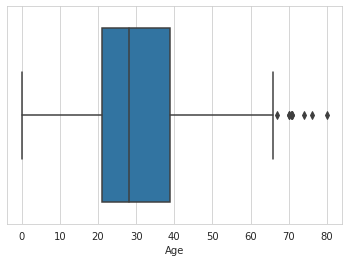

In [18]:
#Age
sns.boxplot(all['Age'])

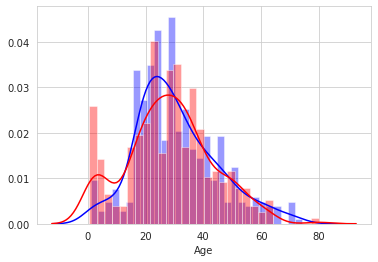

In [19]:
sns.distplot(all[all['Survived']==0]['Age'],bins=30,color='blue')
sns.distplot(all[all['Survived']==1]['Age'],bins=30,color='red')

Lower age has higher chance of survival and the ages are almost normally distributed. 

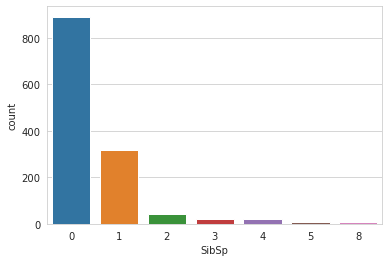

In [20]:
#SibSp
sns.countplot('SibSp',data=all)

In [21]:
groupby_df = all[all['train_or_test']=='train'].groupby(['SibSp', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                Survived
 SibSp Survived          
 0     0.0            398
       1.0            210
 1     0.0             97
       1.0            112
 2     0.0             15
       1.0             13
 3     0.0             12
       1.0              4
 4     0.0             15
       1.0              3
 5     0.0              5
 8     0.0              7,
                 Survived
 SibSp Survived          
 0     0.0          65.46
       1.0          34.54
 1     0.0          46.41
       1.0          53.59
 2     0.0          53.57
       1.0          46.43
 3     0.0          75.00
       1.0          25.00
 4     0.0          83.33
       1.0          16.67
 5     0.0         100.00
 8     0.0         100.00)

Passengers with 1,2 Siblings/Spouses have a higher chance of Survival 

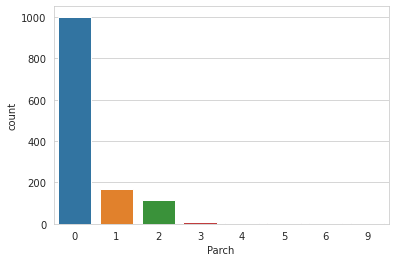

In [22]:
#Parch
sns.countplot('Parch',data=all)

In [23]:
groupby_df = all[all['train_or_test']=='train'].groupby(['Parch', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                Survived
 Parch Survived          
 0     0.0            445
       1.0            233
 1     0.0             53
       1.0             65
 2     0.0             40
       1.0             40
 3     0.0              2
       1.0              3
 4     0.0              4
 5     0.0              4
       1.0              1
 6     0.0              1,
                 Survived
 Parch Survived          
 0     0.0          65.63
       1.0          34.37
 1     0.0          44.92
       1.0          55.08
 2     0.0          50.00
       1.0          50.00
 3     0.0          40.00
       1.0          60.00
 4     0.0         100.00
 5     0.0          80.00
       1.0          20.00
 6     0.0         100.00)

1-3 Parents/Children have higher chance of Survival

In [24]:
#Ticket
all['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
347082           7
S.O.C. 14879     7
                ..
12460            1
347091           1
347086           1
A./5. 3338       1
C.A. 49867       1
Name: Ticket, Length: 929, dtype: int64

In [25]:
sum(all['Ticket'].value_counts()>1)

216

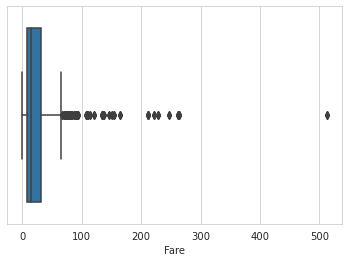

In [26]:
#Fare
sns.boxplot(all['Fare'])

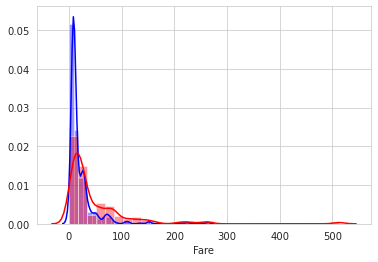

In [27]:
sns.distplot(all[all['Survived']==0]['Fare'],bins=30,color='blue')
sns.distplot(all[all['Survived']==1]['Fare'],bins=30,color='red')

We see passengers with higher Fare have a higher chance of survival

In [28]:
#Cabin
all['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C22 C26            4
                  ..
B61                1
C104               1
A14                1
D56                1
A18                1
Name: Cabin, Length: 186, dtype: int64

In [29]:
sum(all['Cabin'].value_counts()>1)

79

In [30]:
all[all['Cabin']=='C23 C25 C27'] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,train
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,train
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,train
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,train
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,test
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S,test


In [31]:
all[all['Cabin']=='B57 B59 B63 B66'] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,train
742,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,train
915,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,test
955,956,NaN,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,test
1033,1034,NaN,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,test


In [32]:
all['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [33]:
groupby_df = all[all['train_or_test']=='train'].groupby(['Embarked', 'Survived']).agg({'Survived': 'count'})
groupby_pcts = groupby_df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
groupby_df,groupby_pcts

(                   Survived
 Embarked Survived          
 C        0.0             75
          1.0             93
 Q        0.0             47
          1.0             30
 S        0.0            427
          1.0            217,
                    Survived
 Embarked Survived          
 C        0.0          44.64
          1.0          55.36
 Q        0.0          61.04
          1.0          38.96
 S        0.0          66.30
          1.0          33.70)

Embarked C has a higher chance of survival

#### Bivariate Analysis

In [34]:
all.dtypes

PassengerId        int64
Survived         float64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
train_or_test     object
dtype: object

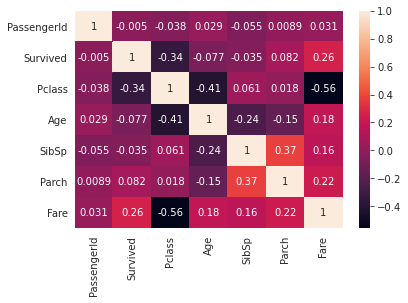

In [35]:
sns.heatmap(all.corr(),annot=True)

##### Continuous & Continuous

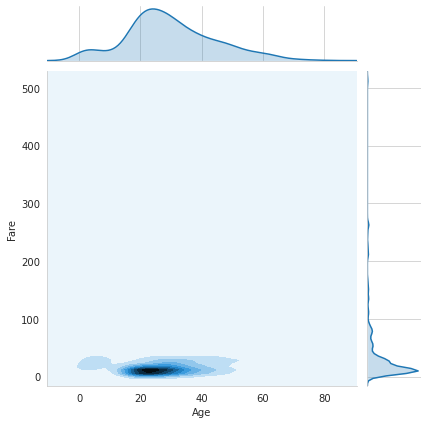

In [36]:
sns.jointplot(x='Age',y='Fare',data=all,kind='kde')

In [37]:
#Correlation
all.corr()['Fare']['Age']

0.1787398559996414

##### Categorical & Categorical

In [38]:
#Sex & Pclass

#Contingency Table
contingency_table=pd.crosstab(all["Sex"],all["Pclass"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Pclass    1    2    3
Sex                  
female  144  106  216
male    179  171  493

Observed Values :-
 [[144 106 216]
 [179 171 493]]

Expected Values :-
 [[114.98701299  98.61115355 252.40183346]
 [208.01298701 178.38884645 456.59816654]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 12.226745306984528

critical_value: 3.841458820694124

p-value: 0.0004710930508484701

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [39]:
#Sex & Parch

#Contingency Table
contingency_table=pd.crosstab(all["Sex"],all["Parch"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Parch     0   1   2  3  4  5  6  9
Sex                               
female  293  88  69  6  4  4  1  1
male    709  82  44  2  2  2  1  1

Observed Values :-
 [[293  88  69   6   4   4   1   1]
 [709  82  44   2   2   2   1   1]]

Expected Values :-
 [[356.70893812  60.51948052  40.2276547    2.84797555   2.13598167
    2.13598167   0.71199389   0.71199389]
 [645.29106188 109.48051948  72.7723453    5.15202445   3.86401833
    3.86401833   1.28800611   1.28800611]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 37.04458208301473

critical_value: 3.841458820694124

p-value: 1.1545894240683197e-09

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [40]:
#Sex & SibSp

#Contingency Table
contingency_table=pd.crosstab(all["Sex"],all["SibSp"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 SibSp     0    1   2   3   4  5  8
Sex                               
female  262  160  19  12   7  2  4
male    629  159  23   8  15  4  5

Observed Values :-
 [[262 160  19  12   7   2   4]
 [629 159  23   8  15   4   5]]

Expected Values :-
 [[317.19327731 113.56302521  14.95187166   7.11993888   7.83193277
    2.13598167   3.2039725 ]
 [573.80672269 205.43697479  27.04812834  12.88006112  14.16806723
    3.86401833   5.7960275 ]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 44.39796750255644

critical_value: 3.841458820694124

p-value: 2.6796564966957703e-11

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [41]:
#Sex & Embarked

#Contingency Table
contingency_table=pd.crosstab(all["Sex"],all["Embarked"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Embarked    C   Q    S
Sex                   
female    113  60  291
male      157  63  623

Observed Values :-
 [[113  60 291]
 [157  63 623]]

Expected Values :-
 [[ 95.8530987   43.66641163 324.48048967]
 [174.1469013   79.33358837 589.51951033]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 14.228166316472308

critical_value: 3.841458820694124

p-value: 0.00016192856784558174

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [42]:
#Pclass & SibSp

#Contingency Table
contingency_table=pd.crosstab(all["Pclass"],all["SibSp"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 SibSp     0    1   2   3   4  5  8
Pclass                            
1       198  113   8   4   0  0  0
2       182   82  12   1   0  0  0
3       511  124  22  15  22  6  9

Observed Values :-
 [[198 113   8   4   0   0   0]
 [182  82  12   1   0   0   0]
 [511 124  22  15  22   6   9]]

Expected Values :-
 [[219.85714286  78.71428571  10.36363636   4.93506494   5.42857143
    1.48051948   2.22077922]
 [188.54621849  67.50420168   8.88770053   4.23223835   4.65546218
    1.2696715    1.90450726]
 [482.59663866 172.78151261  22.7486631   10.83269672  11.91596639
    3.24980901   4.87471352]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 35.891118769936654

critical_value: 3.841458820694124

p-value: 2.0865765781863388e-09

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [43]:
#Pclass & Parch

#Contingency Table
contingency_table=pd.crosstab(all["Pclass"],all["Parch"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Parch     0   1   2  3  4  5  6  9
Pclass                            
1       242  50  27  2  2  0  0  0
2       206  43  25  3  0  0  0  0
3       554  77  61  3  4  6  2  2

Observed Values :-
 [[242  50  27   2   2   0   0   0]
 [206  43  25   3   0   0   0   0]
 [554  77  61   3   4   6   2   2]]

Expected Values :-
 [[2.47246753e+02 4.19480519e+01 2.78831169e+01 1.97402597e+00
  1.48051948e+00 1.48051948e+00 4.93506494e-01 4.93506494e-01]
 [2.12035141e+02 3.59740260e+01 2.39121467e+01 1.69289534e+00
  1.26967150e+00 1.26967150e+00 4.23223835e-01 4.23223835e-01]
 [5.42718105e+02 9.20779221e+01 6.12047364e+01 4.33307869e+00
  3.24980901e+00 3.24980901e+00 1.08326967e+00 1.08326967e+00]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 5.904475412195174

critical_value: 3.841458820694124

p-value: 0.01510246275793048

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [44]:
#Pclass & Embarked

#Contingency Table
contingency_table=pd.crosstab(all["Pclass"],all["Embarked"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Embarked    C    Q    S
Pclass                 
1         141    3  177
2          28    7  242
3         101  113  495

Observed Values :-
 [[141   3 177]
 [ 28   7 242]
 [101 113 495]]

Expected Values :-
 [[ 66.31216526  30.20887529 224.47895945]
 [ 57.22264728  26.06809487 193.70925784]
 [146.46518745  66.72302984 495.81178271]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 183.70888277703472

critical_value: 3.841458820694124

p-value: 0.0

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), dependent.


In [45]:
#SibSp & Parch

#Contingency Table
contingency_table=pd.crosstab(all["SibSp"],all["Parch"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Parch    0   1   2  3  4  5  6  9
SibSp                            
0      790  52  43  2  2  2  0  0
1      183  90  29  5  4  4  2  2
2       26   9   6  1  0  0  0  0
3        3   9   8  0  0  0  0  0
4        0  10  12  0  0  0  0  0
5        0   0   6  0  0  0  0  0
8        0   0   9  0  0  0  0  0

Observed Values :-
 [[790  52  43   2   2   2   0   0]
 [183  90  29   5   4   4   2   2]
 [ 26   9   6   1   0   0   0   0]
 [  3   9   8   0   0   0   0   0]
 [  0  10  12   0   0   0   0   0]
 [  0   0   6   0   0   0   0   0]
 [  0   0   9   0   0   0   0   0]]

Expected Values :-
 [[6.82033613e+02 1.15714286e+02 7.69159664e+01 5.44537815e+00
  4.08403361e+00 4.08403361e+00 1.36134454e+00 1.36134454e+00]
 [2.44184874e+02 4.14285714e+01 2.75378151e+01 1.94957983e+00
  1.46218487e+00 1.46218487e+00 4.87394958e-01 4.87394958e-01]
 [3.21497326e+01 5.45454545e+00 3.62566845e+00 2.56684492e-01
  1.92513369e-01 1.92513369e-01 6.41711230e-02 6.41711230e-02]
 [1.53093

In [46]:
#SibSp & Embarked

#Contingency Table
contingency_table=pd.crosstab(all["SibSp"],all["Embarked"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Embarked    C    Q    S
SibSp                  
0         171  100  618
1          90   14  215
2           9    4   29
3           0    0   20
4           0    5   17
5           0    0    6
8           0    0    9

Observed Values :-
 [[171 100 618]
 [ 90  14 215]
 [  9   4  29]
 [  0   0  20]
 [  0   5  17]
 [  0   0   6]
 [  0   0   9]]

Expected Values :-
 [[1.83649579e+02 8.36625861e+01 6.21687835e+02]
 [6.58990054e+01 3.00206580e+01 2.23080337e+02]
 [8.67635807e+00 3.95256312e+00 2.93710788e+01]
 [4.13159908e+00 1.88217292e+00 1.39862280e+01]
 [4.54475899e+00 2.07039021e+00 1.53848508e+01]
 [1.23947972e+00 5.64651875e-01 4.19586840e+00]
 [1.85921959e+00 8.46977812e-01 6.29380260e+00]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 40.65238878122496

critical_value: 3.841458820694124

p-value: 1.818647454854272e-10

significant result, reject null hypothesis (H0), dependent.

significant result, reject null hypothesis (H0), depende

In [47]:
#Parch & Embarked

#Contingency Table
contingency_table=pd.crosstab(all["Parch"],all["Embarked"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("\nObserved Values :-\n",Observed_Values)

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

#Significance Level 5%
alpha=0.05
print('\nSignificance level: ',alpha)

#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-",chi_square_statistic)

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0).")
    
if p_value<=alpha:
    print("\nsignificant result, reject null hypothesis (H0), dependent.")
else:
    print("\nnot significant result, fail to reject null hypothesis (H0), independent.")

contingency_table :-
 Embarked    C    Q    S
Parch                  
0         196  114  690
1          51    7  112
2          20    1   92
3           3    0    5
4           0    0    6
5           0    1    5
6           0    0    2
9           0    0    2

Observed Values :-
 [[196 114 690]
 [ 51   7 112]
 [ 20   1  92]
 [  3   0   5]
 [  0   0   6]
 [  0   1   5]
 [  0   0   2]
 [  0   0   2]]

Expected Values :-
 [[2.06579954e+02 9.41086458e+01 6.99311400e+02]
 [3.51185922e+01 1.59984698e+01 1.18882938e+02]
 [2.33435348e+01 1.06342770e+01 7.90221882e+01]
 [1.65263963e+00 7.52869166e-01 5.59449120e+00]
 [1.23947972e+00 5.64651875e-01 4.19586840e+00]
 [1.23947972e+00 5.64651875e-01 4.19586840e+00]
 [4.13159908e-01 1.88217292e-01 1.39862280e+00]
 [4.13159908e-01 1.88217292e-01 1.39862280e+00]]

Degree of Freedom:- 1

Significance level:  0.05

chi-square statistic:- 32.629966908184954

critical_value: 3.841458820694124

p-value: 1.1148256540138846e-08

significant result, reject n

All the categorical variables seem to be dependent on each other

##### Categorical & Continuous 

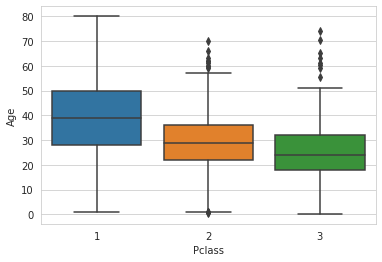

In [48]:
#Pclass & Age
sns.boxplot(x='Pclass',y='Age',data=all)

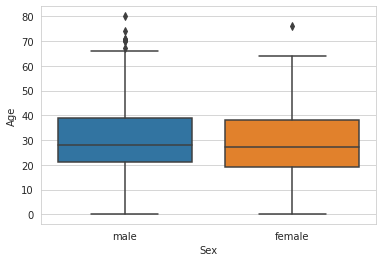

In [49]:
#Sex & Age
sns.boxplot(x='Sex',y='Age',data=all)

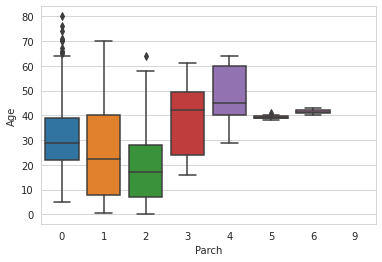

In [50]:
#Parch & Age
sns.boxplot(x='Parch',y='Age',data=all)

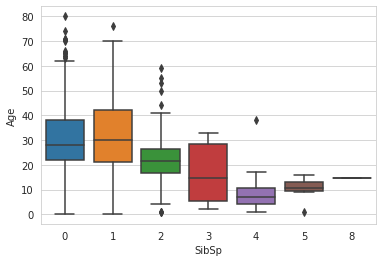

In [51]:
#SibSp & Age
sns.boxplot(x='SibSp',y='Age',data=all)

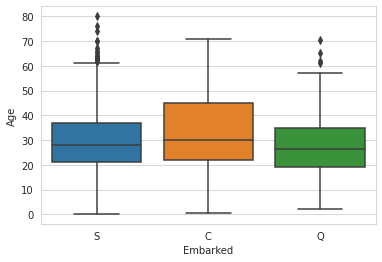

In [52]:
#Embarked & Age
sns.boxplot(x='Embarked',y='Age',data=all)

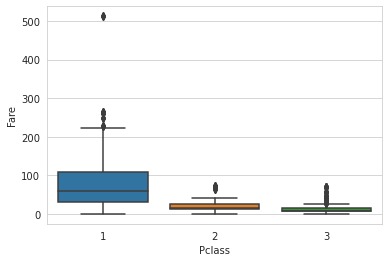

In [53]:
#Pclass & Fare
sns.boxplot(x='Pclass',y='Fare',data=all)

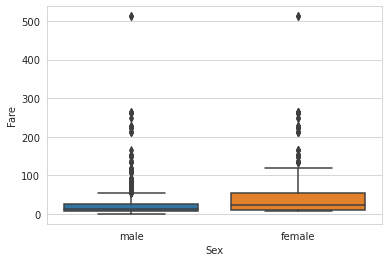

In [54]:
#Sex & Fare
sns.boxplot(x='Sex',y='Fare',data=all)

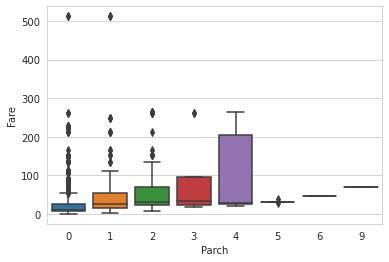

In [55]:
#Parch & Fare
sns.boxplot(x='Parch',y='Fare',data=all)

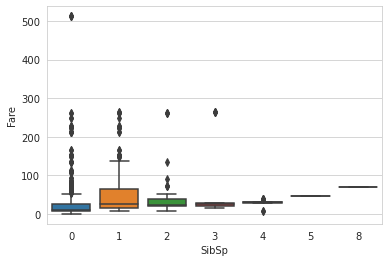

In [56]:
#SibSp & Fare
sns.boxplot(x='SibSp',y='Fare',data=all)

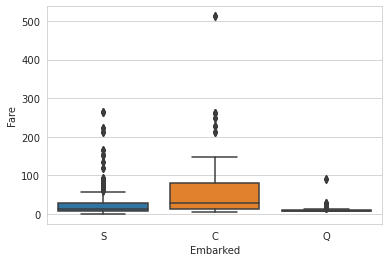

In [57]:
#Embarked & Fare
sns.boxplot(x='Embarked',y='Fare',data=all)

#### Missing Value Treatment

In [58]:
all.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
train_or_test       0
dtype: int64

In [59]:
#Filling Embarked with most common value
all['Embarked']=all['Embarked'].fillna('S')

#Filling Fare with mean(Fare)
all['Fare']=all['Fare'].fillna(all['Fare'].mean())

In [60]:
all.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
train_or_test       0
dtype: int64

In [61]:
#Creating placeholders
all['Age1']=all['Age']
all['Age2']=all['Age']
all['Age3']=all['Age']

#Imputing Age with mean & median
avg_age=all['Age'].mean()
median_age=all['Age'].median()

all['Age1']=all['Age1'].fillna(avg_age)
all['Age2']=all['Age2'].fillna(median_age)

all.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
train_or_test       0
Age1                0
Age2                0
Age3              263
dtype: int64

In [62]:
#Imputing Age with mean of Age by Pclass 
age_by_pclass=all.groupby('Pclass')['Age'].mean()
age_by_pclass

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [63]:
for i in all.index:
    if pd.isnull(all.loc[i,'Age']):
        
        if all.loc[i,'Pclass']==1:
            all.at[i,'Age3']=age_by_pclass[1]
        
        if all.loc[i,'Pclass']==2:
            all.at[i,'Age3']=age_by_pclass[2]
            
        if all.loc[i,'Pclass']==3:
            all.at[i,'Age3']=age_by_pclass[3]
        

In [64]:
all['Age']=all['Age1']
all.drop(['Age1','Age2','Age3'],axis=1,inplace=True)

In [65]:
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [66]:
train_data=all[all['train_or_test']=='train'].drop('train_or_test',axis=1)
test_data=all[all['train_or_test']=='test'].drop(['train_or_test','Survived'],axis=1)

### Building Models

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [68]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked"]
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(train_data[features]), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=101)

#### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [71]:
predictions = logmodel.predict(X_test)

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.82       154
         1.0       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



#### For Submission

In [73]:
X_test = pd.get_dummies(test_data[features])
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [74]:
'''
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\n\ny = train_data["Survived"]\n\nfeatures = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked"]\nX = pd.get_dummies(train_data[features])\nX_test = pd.get_dummies(test_data[features])\n\nmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)\nmodel.fit(X, y)\npredictions = model.predict(X_test)\n'

In [75]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

ValueError: array length 268 does not match index length 418